## KNN Classification Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:

## step 1: Generate synthetic classification data
np.random.seed(42)
num_points = 100

# Class 0
X0 = np.random.randn(num_points, 2) + np.array([0, 0])
y0 = np.zeros(num_points)

# Class 1
X1 = np.random.randn(num_points, 2) + np.array([3, 3])
y1 = np.ones(num_points)

# Combine
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

In [3]:
## step 2: Shuffle and manually split into train, validation, and test
indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

train_size = int(0.6 * len(X))
val_size = int(0.2 * len(X))

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

In [4]:
## step 3: KNN Classification logic (no class or function)
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Try different values of k to find best one using validation set
k_values = [1, 3, 5, 7, 9]
val_accuracies = []

for k in k_values:
    y_val_pred = []

    for x in X_val:
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]

        # Majority vote
        most_common = Counter(nearest_labels).most_common(1)[0][0]
        y_val_pred.append(most_common)

    accuracy = np.mean(np.array(y_val_pred) == y_val)
    val_accuracies.append(accuracy)

# Best k
best_k = k_values[np.argmax(val_accuracies)]
print(f"Best k (from validation): {best_k}")

Best k (from validation): 1


In [5]:
## step 4: Test set prediction using best k
y_test_pred = []

for x in X_test:
    distances = [euclidean_distance(x, x_train) for x_train in X_train]
    nearest_indices = np.argsort(distances)[:best_k]
    nearest_labels = y_train[nearest_indices]

    most_common = Counter(nearest_labels).most_common(1)[0][0]
    y_test_pred.append(most_common)

test_accuracy = np.mean(np.array(y_test_pred) == y_test)
print(f"Test Accuracy with k={best_k}: {test_accuracy * 100:.2f}%")

Test Accuracy with k=1: 97.50%


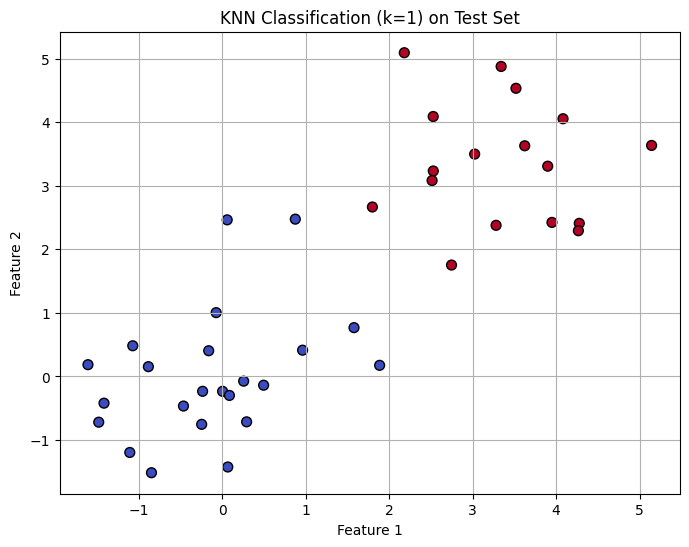

In [6]:
## step 5:  Plot decision boundary or data
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm', s=50, edgecolor='k')
plt.title(f"KNN Classification (k={best_k}) on Test Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()